### Group 62
##### Erling Hjermstad
##### Fredrik Lilliecreutz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
%matplotlib inline

# Task 1

In [2]:
#transcribed from hemnet, prices in million SEK, living-area in m^2

villa_prices = np.array([7, 4.895, 5.85, 4.9, 10.3, 6.7, 6.8, 6.12, 5.35, 7.7, 7.25, 6, 4.6, 3.625, 5, 5.9, 3.4, 6.45, 7.55,
                4.05, 1.9, 6.55, 6.33, 6.08, 7.85, 7.8, 4.9, 7.3, 6.9, 3.4, 7.1, 4.597, 8.6, 4.05, 7.7, 5.3])
living_area = np.array([138, 160, 144, 84, 219, 140, 164, 187, 120, 150, 194, 120, 90, 75, 180, 192, 153, 143,
                152, 108, 80, 228, 140, 120, 262, 210, 146, 230, 240, 65, 188, 122, 262, 152, 145, 105])

# list(zip(villa_prices, living_area))

In [3]:
#regression

linReg = lm.LinearRegression()

linReg.fit(living_area.reshape(-1,1), villa_prices)

r2 = linReg.score(living_area.reshape(-1,1), villa_prices)
coef = linReg.coef_[0]
intercept = linReg.intercept_

print("Slope = ", coef)
print("Intercept = ", intercept)

Slope =  0.023132744168234725
Intercept =  2.3907936306816584


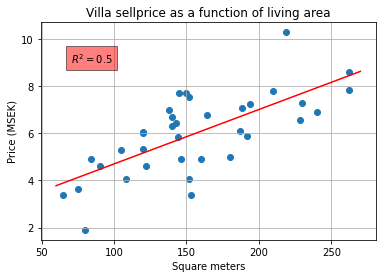

In [4]:
#Regression plot

plt.title('Villa sellprice as a function of living area')
plt.grid(True)
plt.text(70, 9, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel('Square meters')
plt.ylabel('Price (MSEK)')
plt.scatter(living_area, villa_prices)
plt.plot([60, 270], [coef*60 + intercept, coef*270 + intercept], 'r-')
plt.show()
plt.close()

In [5]:
#Prediction

def predicted_price(sqMetres):
    return np.round(coef*sqMetres + intercept, 2)

print("Cost of 100sqm villa in Landvetter: ", predicted_price(100), "million SEK")
print("Cost of 150sqm villa in Landvetter: ", predicted_price(150), "million SEK")
print("Cost of 200sqm villa in Landvetter: ", predicted_price(200), "million SEK")

Cost of 100sqm villa in Landvetter:  4.7 million SEK
Cost of 150sqm villa in Landvetter:  5.86 million SEK
Cost of 200sqm villa in Landvetter:  7.02 million SEK


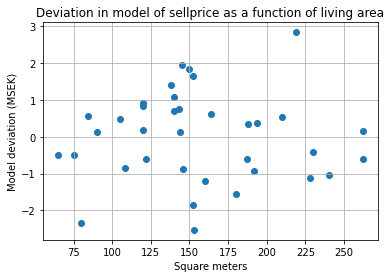

Sum of residuals: -0.003
Mean of residuals: -0.0001
Variance of residuals: 1.4128
SD of residuals: 1.1886


In [6]:
residual_price = villa_prices - predicted_price(living_area)

plt.title('Deviation in model of sellprice as a function of living area')
plt.grid(True)
plt.xlabel('Square meters')
plt.ylabel('Model deviation (MSEK)')
plt.scatter(living_area, residual_price)
plt.show()
plt.close()


print("Sum of residuals:", np.round(sum(residual_price), 4))
print("Mean of residuals:", np.round(np.mean(residual_price), 4))
print("Variance of residuals:", np.round(np.var(residual_price), 4))
print("SD of residuals:", np.round(np.std(residual_price), 4))

Seemingly randomly distributed around zero. Indicates good fit with linear regression. However the variance is big, which indicates that more factors should be included for more precise estimates.

# Task 2

In [7]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import seaborn as sns

In [8]:
iris = load_iris()

print(iris.DESCR)#150 flowers with 4 attributes each

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
training_data, test_data, training_labels, test_labels = train_test_split(iris.data, iris.target, test_size=0.33) #split the set in 2/3 training and 1/3 test

logReg = LogisticRegression(multi_class='ovr', solver='liblinear')
logReg.fit(training_data, training_labels)

predictions = logReg.predict(test_data)

score = logReg.score(test_data, test_labels)
print("The model predicted the test data with", score*100, "% accuracy")

The model predicted the test data with 96.0 % accuracy


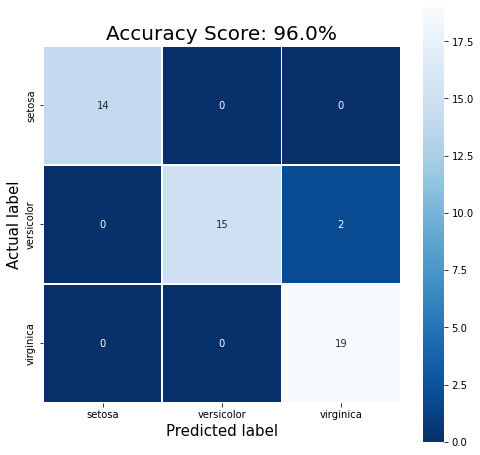

In [10]:
conf_matrix  = metrics.confusion_matrix(test_labels, predictions)

def plot_confusion_matrix(conf_matrix, plot = True, save = False, filename = None):    
    plt.figure(figsize=(8,8)) #size in inches
    sns.heatmap(conf_matrix, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.ylabel('Actual label', size=15)
    plt.xlabel('Predicted label', size=15)
    plt.title('Accuracy Score: {fscore:.{precision}f}%'.format(fscore = score*100, precision = 1), size = 20)
    if save:
        plt.savefig(filename)
    if plot:
        plt.show()
    plt.close()

plot_confusion_matrix(conf_matrix, save = False, filename = 'LogReg_confusion_matrix.png')


# Task 3 and 4

In [11]:
from sklearn.neighbors import KNeighborsClassifier

#k nearest neighbors and plot export

weigths = ['uniform', 'distance']
for i in range(2):
    print(weigths[i])
    for n_neighbors in range(1, 10):
        k_neig = KNeighborsClassifier(weights = weigths[i], n_neighbors=n_neighbors*10)
        k_neig.fit(training_data, training_labels)
        score = k_neig.score(test_data, test_labels)
        print(n_neighbors*10, ":", score)

        predictions = k_neig.predict(test_data)        
        conf_matrix  = metrics.confusion_matrix(test_labels, predictions)
        plot_confusion_matrix(conf_matrix, save = True, plot = False, filename = 'knn_' + str(n_neighbors) + '_' + weigths[i] + '_confusion_matrix.png')
        


print("Too large k, k = 100")
k_neig = KNeighborsClassifier(weights = 'uniform', n_neighbors=100)
k_neig.fit(training_data, training_labels)
score = k_neig.score(test_data, test_labels)
print("uniform :", score)


predictions = k_neig.predict(test_data)        
conf_matrix  = metrics.confusion_matrix(test_labels, predictions)
plot_confusion_matrix(conf_matrix, save = True, plot = False, filename = 'knn_100_uniform_confusion_matrix.png')


k_neig = KNeighborsClassifier(weights = 'distance', n_neighbors=100)
k_neig.fit(training_data, training_labels)
score = k_neig.score(test_data, test_labels)
print("distance :", score)


predictions = k_neig.predict(test_data)        
conf_matrix  = metrics.confusion_matrix(test_labels, predictions)
plot_confusion_matrix(conf_matrix, save = True, plot = False, filename = 'knn_100_distance_confusion_matrix.png')

uniform
1 : 0.96
2 : 0.96
3 : 0.96
4 : 0.96
5 : 0.98
6 : 0.98
7 : 0.98
8 : 1.0
9 : 1.0
distance
1 : 0.96
2 : 0.96
3 : 0.96
4 : 0.96
5 : 0.98
6 : 0.98
7 : 0.98
8 : 0.98
9 : 0.98
Too large k, k = 100
uniform : 0.28
distance : 0.98


When k-grows, more datapoints will be considered when predicting the value of a new datapoint. Too large K might lead to datapoints far away influencing the result and underfitting. Too low k and the model might be overfitted.

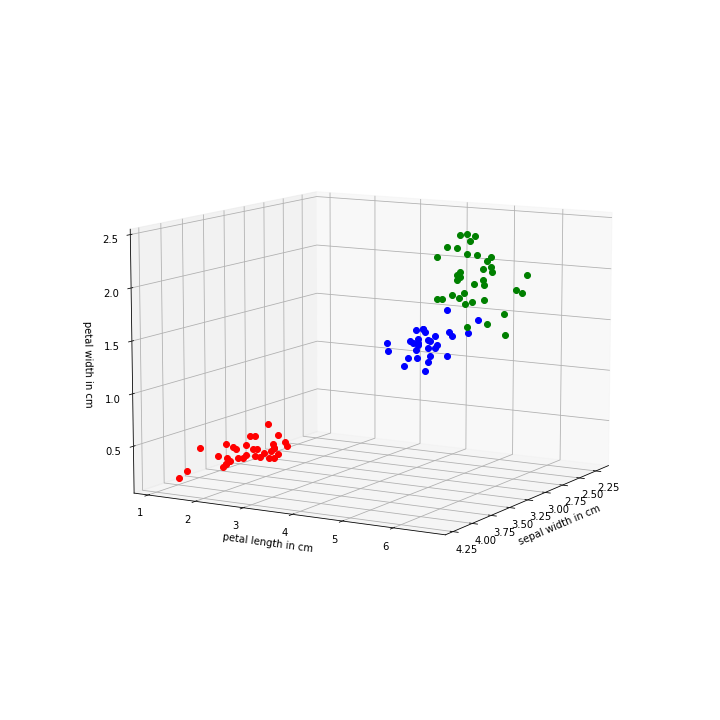

In [230]:
#plotting

%matplotlib widget

from mpl_toolkits import mplot3d #plot 3 of 4 attributes

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')


zipped_data = list(zip(training_data, training_labels))
zipped_data.sort(key = lambda arr: arr[1])

colors = {0: 'ro', 1: 'bo', 2:'go'}

for elem in zipped_data:   
    ax.plot(elem[0][1], elem[0][2], elem[0][3], colors[elem[1]])

ax.set_xlabel('sepal width in cm')
ax.set_ylabel('petal length in cm')
ax.set_zlabel('petal width in cm')
ax.view_init(10, 30)

plt.show()

